# Code Quality Dataset - Feature Engineering Pipeline

In [1]:
import pandas as pd
import numpy as np
import json
import ast
import warnings
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

print("✓ Libraries imported")

✓ Libraries imported


In [2]:
input_file = "../data/raw/dataset.csv"
output_file = "../data/processed/dataset_processed.csv"

print(f"Input: {input_file}")
print(f"Output: {output_file}")

Input: ../data/raw/dataset.csv
Output: ../data/processed/dataset_processed.csv


# EDA & Feature Engineering  

In [3]:
def safe_parse(val):
    if pd.isna(val) or val == '': return None
    if isinstance(val, (dict, list, int, float)): return val
    try:
        return json.loads(val)
    except:
        try:
            return ast.literal_eval(str(val))
        except:
            return None

In [4]:
print(f"Loading data from {input_file}...")

try:
    df = pd.read_csv(input_file, low_memory=False)
    print(f"✓ Data loaded. Shape: {df.shape}")
    print(f"✓ Total columns: {len(df.columns)}")
except Exception as e:
    print(f"Error loading data: {e}")

Loading data from ../data/raw/dataset.csv...
✓ Data loaded. Shape: (3088, 79)
✓ Total columns: 79


In [5]:
df.head()

,abbreviation_density,attribute_mutations_outside_init,average_cyclomatic_complexity,average_methods_per_class,avg_line_length,boolean_expression_avg_terms,call_graph_density,classes,classes_with_inheritance,comment_code_mismatch_score,comment_lines,comment_percentage,commit_bursts,coupled_file_changes,cross_file_call_edges,decision_density,documentation_coverage,external_vs_internal_field_access_ratio,file_age_days,file_path,functions,global_usages_total,globals_declared,god_class_proxies,halstead_difficulty,halstead_effort,halstead_estimated_bugs,halstead_volume,indentation_irregularity,inter_file_coupling,large_parameter_list_indicator,lazy_class_indicator,lines_added,lines_deleted,lines_of_code,long_method_indicator,maintainability_score,max_cyclomatic_ratio,max_intra_file_call_depth,max_line_length,max_lines_per_class,max_lines_per_function,max_nesting_level,mean_cyclomatic_ratio,mean_lines_per_class,mean_lines_per_function,mean_param_entropy,methods,nesting_variance,num_authors,pep8_examples,pep8_violations,percent_lines_over_80,semantic_todo_density,smells,source_lines,test_files_found,test_function_count,test_lines,test_to_source_ratio,todo_fixme_count,todo_fixme_semantic_density,total_imports,unit_test_presence,vcs_available,vcs_top_coupled,y_FeatureEnvy,y_FormattingIssues,y_GlobalStateAbuse,y_GodClass,y_LargeParameterList,y_LazyClass,y_LongMethod,y_MisleadingComments,y_PoorDocumentation,y_ShotgunSurgery,y_SpaghettiCode,y_UnstableModule,y_UntestedCode
0,0.000,0,6.5,0.0,34.2,0.0,0.5,0,0,0.0,14,16.7,1,{},"[{'caller': 'sort_blocks', 'module': 'read_me'...",0.2727,0.0,11.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,2,0,0,[],3.15,2259.11,0.2391,717.18,"{'indent_stddev': 3.77, 'irregularity_score': ...",6,False,False,83,0,84,False,75,0.259,1,102,0,35,3,0.244,0.0,31.0,0.000,0,0.5,1,"['line 14: length 80', 'line 38: length 102']",2,1.19,0.0,"[{'severity': 'MINOR', 'type': 'PoorDocumentat...",44,0,0,0,0.0,0,0.0,0,False,True,[],1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.000,0,3.0,0.0,32.0,0.0,0.0,0,0,0.0,2,9.5,1,{},"[{'caller': 'pdm_build_initialize', 'module': ...",0.1429,0.0,3.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,1,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.78, 'irregularity_score': ...",1,False,False,20,0,21,False,85,0.250,0,74,0,12,1,0.250,0.0,12.0,2.522,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LargeParameter...",14,397,1932,70343,5024.5,0,0.0,3,False,True,[],0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.333,0,2.0,0.0,21.0,0.0,0.0,2,2,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0714,0.0,1.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.51, 'irregularity_score': ...",1,False,False,22,0,23,False,85,0.500,0,86,0,4,1,0.500,0.0,4.0,2.522,0,0.0,1,['line 18: length 86'],1,4.35,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",14,0,0,0,0.0,0,0.0,3,False,True,[],0,1,0,0,0,1,0,0,1,0,0,0,0
3,0.500,0,2.0,0.0,19.6,0.0,0.0,1,1,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0455,0.0,1.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,0,1,1,[],0.68,83.01,0.0410,122.98,"{'indent_stddev': 3.81, 'irregularity_score': ...",1,False,False,28,0,29,False,85,0.400,0,64,0,5,1,0.400,0.0,5.0,2.646,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",22,0,0,0,0.0,0,0.0,3,False,True,[],0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.500,0,2.0,0.0,19.3,0.0,0.0,1,1,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0435,0.0,1.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 3.82, 'irregularity_score': ...",1,False,False,30,0,31,False,85,0.400,0,65,0,5,1,0.400,0.0,5.0,2.646,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",23,0,0,0,0.0,0,0.0,4,False,True,[],0,0,0,0,0,1,0,0,1,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 79 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   abbreviation_density                     3088 non-null   float64
 1   attribute_mutations_outside_init         3088 non-null   int64  
 2   average_cyclomatic_complexity            3088 non-null   float64
 3   average_methods_per_class                3088 non-null   float64
 4   avg_line_length                          3088 non-null   float64
 5   boolean_expression_avg_terms             3088 non-null   float64
 6   call_graph_density                       3088 non-null   float64
 7   classes                                  3088 non-null   int64  
 8   classes_with_inheritance                 3088 non-null   int64  
 9   comment_code_mismatch_score              3088 non-null   float64
 10  comment_lines                            3088 no

In [7]:
# Define column groups
json_cols = ['coupled_file_changes', 'cross_file_call_edges', 'smells', 'pep8_examples', 'indentation_irregularity', 'god_class_proxies', 'pep8_violations']

# Parse JSON columns directly
print("Parsing JSON columns...")
for col in json_cols:
    if col in df.columns:
        df[col] = df[col].apply(safe_parse)
        print(f"  ✓ Parsed {col}")

# Identify other types for later use
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = [c for c in df.columns if df[c].dtype == bool]

print(f"✓ Column types identified")
print(f"  Numeric columns: {len(numeric_cols)}")
print(f"  Object columns: {len(object_cols)}")

Parsing JSON columns...
  ✓ Parsed coupled_file_changes
  ✓ Parsed cross_file_call_edges
  ✓ Parsed smells
  ✓ Parsed pep8_examples
  ✓ Parsed indentation_irregularity
  ✓ Parsed god_class_proxies
  ✓ Parsed pep8_violations
✓ Column types identified
  Numeric columns: 66
  Object columns: 8


In [8]:
# All target columns (code smells detected)
target_cols = [c for c in df.columns if c.startswith('y_')]

print(f"Found {len(target_cols)} code smell indicators:")
print(target_cols)

# Create a composite target: any code smell present
if target_cols:
    df['y_any_smell'] = (df[target_cols].sum(axis=1) > 0).astype(int)
    print(f"\n✓ Composite target created: y_any_smell")
    print(f"  Code smells found: {df['y_any_smell'].sum()} / {len(df)}")


Found 13 code smell indicators:
['y_FeatureEnvy', 'y_FormattingIssues', 'y_GlobalStateAbuse', 'y_GodClass', 'y_LargeParameterList', 'y_LazyClass', 'y_LongMethod', 'y_MisleadingComments', 'y_PoorDocumentation', 'y_ShotgunSurgery', 'y_SpaghettiCode', 'y_UnstableModule', 'y_UntestedCode']

✓ Composite target created: y_any_smell
  Code smells found: 2685 / 3088


In [9]:
print("Encoding categorical features...")

# Binary encoding (Keep this for boolean features)
for col in ['unit_test_presence', 'vcs_available']:
    if col in df.columns:
        df[col] = df[col].astype(int)
        
if 'file_path' in df.columns:
    print(f"  ✓ Preserving 'file_path' for later identification")
    df['file_path'] = df['file_path'].str.replace(r'D:\\.*?\\data\\temp\\', '', regex=True)

print("✓ Categorical encoding complete file_path preserved as relative paths")

Encoding categorical features...
  ✓ Preserving 'file_path' for later identification
✓ Categorical encoding complete file_path preserved as relative paths


Analyzing Feature-Target Correlations...
Number of targets: 14
Number of features: 55


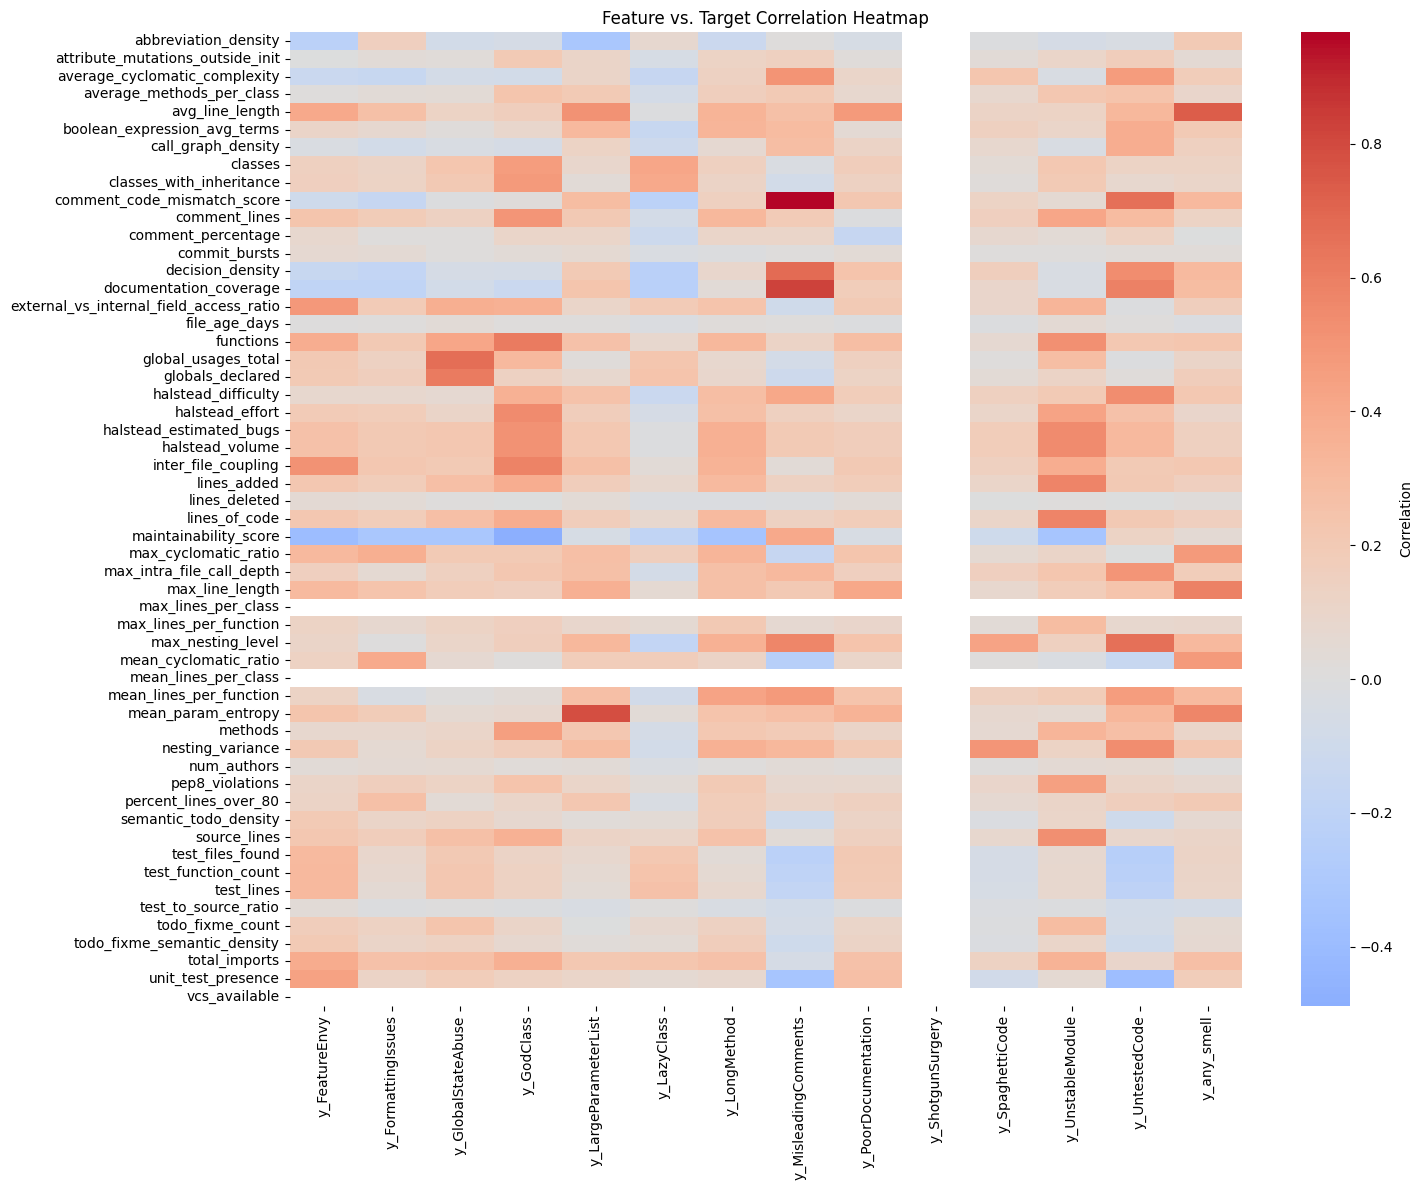

In [10]:
## 10. Correlation Analysis (Focus on Weakest Correlations)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

print("Analyzing Feature-Target Correlations...")

# 1. Identify groups
target_cols = [c for c in df.columns if c.startswith('y_')]
feature_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in target_cols]

target_cols_len = len(target_cols)
feature_cols_len = len(feature_cols)

print(f"Number of targets: {target_cols_len}")
print(f"Number of features: {feature_cols_len}")


if target_cols and feature_cols:
    # 2. Calculate Correlation Matrix
    full_corr = df[feature_cols + target_cols].corr()
    target_corr_matrix = full_corr.loc[feature_cols, target_cols]

    # 3. Plot Heatmap (Overview)
    plt.figure(figsize=(15, 12))
    sns.heatmap(target_corr_matrix, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
    plt.title('Feature vs. Target Correlation Heatmap')
    plt.tight_layout()
    plt.show()

In [11]:
df.drop(columns=['abbreviation_density', 'attribute_mutations_outside_init', 'maintainability_score', 'max_lines_per_class', 'mean_lines_per_class', 'vcs_available', 'y_ShotgunSurgery', 'smells', 'commit_bursts', 'lines_deleted', 'coupled_file_changes', 'god_class_proxies', 'indentation_irregularity', 'pep8_examples', 'vcs_top_coupled', 'cross_file_call_edges'], inplace=True)

In [12]:
## 12. Normalize Remaining Features
print("\n" + "="*60)
print("NORMALIZING FEATURES")
print("="*60)

numeric_cols = df.select_dtypes(include=[np.number]).columns
skip_cols = [c for c in numeric_cols if c.startswith('y_')]

scaler = MinMaxScaler()
df[numeric_cols.difference(skip_cols)] = scaler.fit_transform(df[numeric_cols.difference(skip_cols)])

print(f"✓ Normalized {len(numeric_cols) - len(skip_cols)} features to [0, 1]")


NORMALIZING FEATURES
✓ Normalized 47 features to [0, 1]


In [13]:
## 13. Final Summary
print("\n" + "="*60)
print("FINAL DATASET SUMMARY")
print("="*60)

print(f"Shape: {df.shape}")
print(f"\nFeatures (X): {len(df.columns) - len([c for c in df.columns if c.startswith('y_')]) - 2}")  # -1 for file_path
print(f"Targets (y): {len([c for c in df.columns if c.startswith('y_')])}")
print(f"\nDataFrame Info:")
print(df.info())


FINAL DATASET SUMMARY
Shape: (3088, 69)

Features (X): 54
Targets (y): 13

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   average_cyclomatic_complexity            3088 non-null   float64
 1   average_methods_per_class                3088 non-null   float64
 2   avg_line_length                          3088 non-null   float64
 3   boolean_expression_avg_terms             3088 non-null   float64
 4   call_graph_density                       3088 non-null   float64
 5   classes                                  3088 non-null   float64
 6   classes_with_inheritance                 3088 non-null   float64
 7   comment_code_mismatch_score              3088 non-null   float64
 8   comment_lines                            3088 non-null   float64
 9   comment_percentage        

In [14]:
## 14. Save Cleaned Data
print("\n" + "="*60)
print("SAVING CLEANED DATASET")
print("="*60)

try:
    df.to_csv(output_file, index=False)
    print(f"✓ Saved to {output_file}")
except Exception as e:
    print(f"Error saving: {e}")



SAVING CLEANED DATASET
✓ Saved to ../data/processed/dataset_processed.csv
